# Refactor polygon boundedness check ([LazySets#1925](https://github.com/JuliaReach/LazySets.jl/issues/1925))

In [1]:
using Revise, ReachabilityAnalysis

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/ReachabilityAnalysis/fYI0z.ji for ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1240


In [ ]:
@system

In [3]:
H = rand(HPolygon)

HPolygon{Float64}(HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[HalfSpace{Float64,Array{Float64,1}}([1.261028856189669, 1.3878735112026346], 1.2919114867674186), HalfSpace{Float64,Array{Float64,1}}([0.13162348864246542, 0.46729639650253496], 0.6960427258834989), HalfSpace{Float64,Array{Float64,1}}([-0.2847803843054808, 0.502842596864258], 1.328225752651445), HalfSpace{Float64,Array{Float64,1}}([-1.5904476178889724, -1.09839250216917], 1.2166533887508149), HalfSpace{Float64,Array{Float64,1}}([-0.6061499025734981, -0.6318548474879431], 0.4643511951445736), HalfSpace{Float64,Array{Float64,1}}([1.0887255599358168, -0.6277651549123144], 0.2398672848766943)])

In [8]:
using BenchmarkTools

In [9]:
@btime isbounded($H, false)

  44.787 μs (286 allocations: 18.61 KiB)


true

In [12]:
45e-6 * 20_000

0.9

In [10]:
@which isbounded(H, false)

isbounded(P::AbstractHPolygon, use_type_assumption::Bool) in LazySets at /home/mforets/.julia/dev/LazySets/src/Interfaces/AbstractHPolygon.jl:576

In [17]:
@which isbounded_unit_dimensions(HPolyhedron(H.constraints))

isbounded_unit_dimensions(S::LazySet{N}) where N<:Real in LazySets at /home/mforets/.julia/dev/LazySets/src/Interfaces/LazySet.jl:248

In [20]:
H

HPolygon{Float64}(HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[HalfSpace{Float64,Array{Float64,1}}([1.261028856189669, 1.3878735112026346], 1.2919114867674186), HalfSpace{Float64,Array{Float64,1}}([0.13162348864246542, 0.46729639650253496], 0.6960427258834989), HalfSpace{Float64,Array{Float64,1}}([-0.2847803843054808, 0.502842596864258], 1.328225752651445), HalfSpace{Float64,Array{Float64,1}}([-1.5904476178889724, -1.09839250216917], 1.2166533887508149), HalfSpace{Float64,Array{Float64,1}}([-0.6061499025734981, -0.6318548474879431], 0.4643511951445736), HalfSpace{Float64,Array{Float64,1}}([1.0887255599358168, -0.6277651549123144], 0.2398672848766943)])

In [19]:
@btime isbounded_unit_dimensions($H)

  2.928 μs (72 allocations: 3.50 KiB)


true

# Add @ivp macro (MathematicalSystems#)

In [2]:
using Revise, MathematicalSystems 

Ueli has proposed to overload the `@system` macro with the initial condition, eg.

```julia
    @system(x' = -ax, x(0) ∈ X0)
```

# RA, linear

In [4]:
using Revise, ReachabilityAnalysis

In [5]:
S = @system(x' = x)
P = InitialValueProblem(S, Interval(0, 1))

InitialValueProblem{LinearContinuousSystem{Bool,IdentityMultiple{Bool}},Interval{Float64,IntervalArithmetic.Interval{Float64}}}(LinearContinuousSystem{Bool,IdentityMultiple{Bool}}(Bool[1]), Interval{Float64,IntervalArithmetic.Interval{Float64}}([0, 1]))

In [6]:
solve(P, T=1.0)

UndefKeywordError: UndefKeywordError: keyword argument tspan not assigned

### DifferentialEquations

In [ ]:
using DifferentialEquations

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1240


In [ ]:
solve(ReachabilityProblem(f, u0, tspan), ..., kwargs)

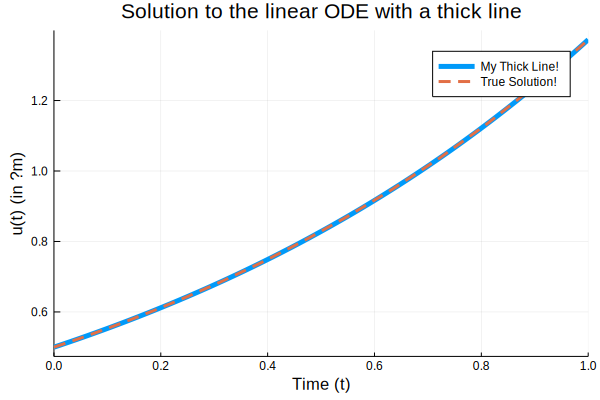

In [8]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = DifferentialEquations.solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

In [30]:
DifferentialEquations.solve(prob, reltol=1e-8, abstol=1e-8, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 17-element Array{Float64,1}:
 0.0                 
 0.012407826196308189
 0.042501278333560696
 0.0817804940926822  
 0.12887384498704435 
 0.18409796286152927 
 0.24627457447456758 
 0.31479297816557983 
 0.3885963515160237  
 0.4668617724420117  
 0.5487161305960653  
 0.6334346972152323  
 0.7203630000154827  
 0.808957991167541   
 0.8987655040395068  
 0.9894161889652783  
 1.0                 
u: 17-element Array{Float64,1}:
 0.5               
 0.5063053789114713
 0.5219304750950854
 0.5430527156531716
 0.5695067765051011
 0.6021743618001767
 0.6412025634645868
 0.6871475244605603
 0.740325839893325 
 0.8012223416244078
 0.8702768595124218
 0.9480214633315532
 1.0350186537489083
 1.1319031171663114
 1.2393734610662301
 1.3582039071131538
 1.3728005076225742

see http://github.com/JuliaDiffEq/CommonSolve.jl

```julia
init(::ProblemType, args...; kwargs...)::SolverType
solve!(::SolverType)::SolutionType
```

In [33]:
DifferentialEquations.solve(prob, reltol=1e-8, abstol=1e-8, Tsit5());

# Symbolic interval matrix power

In [1]:
using Revise

In [3]:
using ModelingToolkit

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/ModelingToolkit/Qmdqu.ji for ModelingToolkit [961ee093-0014-501f-94e3-6117800e7a78]
└ @ Base loading.jl:1240


In [4]:
@variables A[1:2, 1:2]

(Operation[A₁̒₁ A₁̒₂; A₂̒₁ A₂̒₂],)

In [9]:
A2 = A * A

2×2 Array{Operation,2}:
 A₁̒₁ * A₁̒₁ + A₁̒₂ * A₂̒₁  A₁̒₁ * A₁̒₂ + A₁̒₂ * A₂̒₂
 A₂̒₁ * A₁̒₁ + A₂̒₂ * A₂̒₁  A₂̒₁ * A₁̒₂ + A₂̒₂ * A₂̒₂

In [10]:
A2

2×2 Array{Operation,2}:
 A₁̒₁ * A₁̒₁ + A₁̒₂ * A₂̒₁  A₁̒₁ * A₁̒₂ + A₁̒₂ * A₂̒₂
 A₂̒₁ * A₁̒₁ + A₂̒₂ * A₂̒₁  A₂̒₁ * A₁̒₂ + A₂̒₂ * A₂̒₂

In [2]:
using IntervalMatrices

In [3]:
A = [Interval(1, 1) Interval(0, 1); Interval(1, 1) Interval(-1, -1)] |> IntervalMatrix

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 1]    [0, 1]
 [1, 1]  [-1, -1]

In [4]:
square(A)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 2]  [0, 0]
 [0, 0]  [1, 2]

In [5]:
A * A

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 2]  [-1, 1]
 [0, 0]   [1, 2]

In [6]:
using SymEngine

In [70]:
@vars M[1:2]

LoadError: AssertionError: @syms expected a list of symbols

In [60]:
M = [a b; c d]

2×2 Array{Basic,2}:
 a  b
 c  d

In [25]:
M² = M * M

2×2 Array{Basic,2}:
 b*c + a^2  a*b + b*d
 a*c + c*d  b*c + d^2

In [40]:
expr = M²[1, 2]

a*b + b*d

In [38]:
M³ = M * M * M

2×2 Array{Basic,2}:
 a*(b*c + a^2) + c*(a*b + b*d)  b*(b*c + a^2) + d*(a*b + b*d)
 a*(a*c + c*d) + c*(b*c + d^2)  b*(a*c + c*d) + d*(b*c + d^2)

In [56]:
expr = M³[1, 1]

a*(b*c + a^2) + c*(a*b + b*d)

In [57]:
ex = convert(Expr, expr)

:(c * (b * d + a * b) + a * (b * c + a ^ 2))

Idea from: https://discourse.julialang.org/t/substitute-symbols-in-expression/23099

In [7]:
using MacroTools: postwalk

function matsubs(ex)
    if ex == :a
        return A[1, 1]
    elseif ex == :b
        return A[1, 2]
    elseif ex == :c
        return A[2, 1]
    elseif ex == :d
        return A[2, 2]
    else
        return ex
    end
end

eval(postwalk(matsubs, ex))

UndefVarError: UndefVarError: ex not defined

In [72]:
using MacroTools: postwalk

ex = :(x + x^2 + x^3)
postwalk(ex -> ex == :x ? Interval(0, 1) : ex, ex)

:([0, 1] + [0, 1] ^ 2 + [0, 1] ^ 3)

In [73]:
eval(ans)

[0, 3]

In [59]:
postwalk(ex -> ex == :a ? Interval(0, 1) : ex, ex)

:(c * (b * d + [0, 1]b) + [0, 1] * (b * c + [0, 1] ^ 2))

In [33]:
subs(M²[1, 1], a=> 2.0)

4.0 + b*c

In [36]:
subs(M3[1, 1], a=>Interval(0, 1), b=>Interval(0, 1), c=>Interval(0, 1), d=>Interval(0, 1))

StackOverflowError: StackOverflowError:

In [82]:
using BenchmarkTools

In [85]:
f(n) = M^n;

@btime f(10)

  13.011 μs (64 allocations: 1.28 KiB)


2×2 Array{Basic,2}:
 (a*b + b*d)*(((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2) + ((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + d^2)^2)) + (b*c + a^2)*(((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2)) + ((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2)^2)  …  (a*b + b*d)*(((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2)) + ((a*b + b*d)*(a*c + c*d) + (b*c + d^2)^2)^2) + (((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2) + ((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*b + b*d)*(a*c + c*d) + (b*c + d^2)^2))*(b*c + a^2)
 (a*c + c*d)*(((a*b + b*d)*(b*c + a^2) + (a*b + b*d)*(b*c + d^2))*((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2)) + ((a*b + b*d)*(a*c + c*d) + (b*c + a^2)^2)^2) + (((a*c + c*d)*(b*c + a^2) + (a*c + c*d)*(b*c + d^2))*((a*b + b*d)*(a

In [86]:
[@btime f($i) for i in 1:10]

  43.105 ns (1 allocation: 112 bytes)
  3.289 μs (17 allocations: 336 bytes)
  6.408 μs (30 allocations: 640 bytes)
  6.638 μs (34 allocations: 672 bytes)
  9.689 μs (47 allocations: 976 bytes)
  9.722 μs (47 allocations: 976 bytes)
  12.926 μs (60 allocations: 1.25 KiB)
  10.483 μs (51 allocations: 1008 bytes)
  13.045 μs (64 allocations: 1.28 KiB)
  13.124 μs (64 allocations: 1.28 KiB)


In [89]:
n = 10
Ms = Matrix{SymEngine.Basic}(undef, n, n)

10×10 Array{Basic,2}:
 #undef  #undef  #undef  #undef  #undef  …  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef  …  #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef
 #undef  #undef  #undef  #undef  #undef     #undef  #undef  #undef  #undef

In [8]:
subidx(i) = join(Char.(0x2080 .+ convert.(UInt16, digits(i)[end:-1:1])))

subidx (generic function with 1 method)

In [11]:
n = 2
# create a new symbolic matrix of order n with name M
# e.g. for order n = 2,
# _symbolic_matrix(2)
# 2×2 Array{Basic,2}:
# M₁₁  M₁₂
# M₂₁  M₂₂
#
function _symbolic_matrix(n; name="M")
    M = Matrix{SymEngine.Basic}(undef, n, n)
    for i in 1:n, j in 1:n
        M[i, j] = name * subidx(i) * subidx(j)
    end
    return M
end

_symbolic_matrix (generic function with 1 method)

In [41]:
Asym = _symbolic_matrix(2, name="A")

2×2 Array{Basic,2}:
 A₁₁  A₁₂
 A₂₁  A₂₂

In [40]:
A

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 1]    [0, 1]
 [1, 1]  [-1, -1]

Now we would like to substitute the interval matrix `A` into the symbolic matrix `A` after taking some power.

In [42]:
Asym² = Asym^2

2×2 Array{Basic,2}:
   A₁₂*A₂₁ + A₁₁^2  A₁₁*A₁₂ + A₁₂*A₂₂
 A₁₁*A₂₁ + A₂₂*A₂₁    A₁₂*A₂₁ + A₂₂^2

MacroTools to the rescue.

In [23]:
using MacroTools: postwalk

In [43]:
Asym²_11 = Asym²[1, 1]

A₁₂*A₂₁ + A₁₁^2

In [62]:
ex = Asym²_11
ex = convert(Expr, ex) # important (!)

:(A₁₂ * A₂₁ + A₁₁ ^ 2)

In [87]:
function subs(ex, imat, n; name="M")
    #println(ex)
    for i in 1:n, j in 1:n
        name_ij = Symbol(name * subidx(i) * subidx(j))
        if ex == name_ij
            return imat[i, j]
        end
    end
    return ex
end

subs (generic function with 2 methods)

In [86]:
postwalk(ex -> subs(ex, A, n, name="A"), ex)

+
*
A₁₂
A₂₁
[0, 1] * [1, 1]
^
A₁₁
2
[1, 1] ^ 2
[0, 1] * [1, 1] + [1, 1] ^ 2


:([0, 1] * [1, 1] + [1, 1] ^ 2)

In [89]:
res = postwalk(ex -> subs(ex, A, n, name="A"), ex)

:([0, 1] * [1, 1] + [1, 1] ^ 2)

In [90]:
eval(res)

[1, 2]

In [96]:
:x

:x

See also:

- https://github.com/chakravala/Reduce.jl

---

In [1]:
# self-contained example
using SymEngine, RangeEnclosures, IntervalMatrices
using MacroTools: postwalk

subidx(i) = join(Char.(0x2080 .+ convert.(UInt16, digits(i)[end:-1:1])))

function symbolic_matrix(n; name="M")
    M = Matrix{SymEngine.Basic}(undef, n, n)
    for i in 1:n, j in 1:n
        M[i, j] = name * subidx(i) * subidx(j)
    end
    return M
end

function subs(ex, imat; name="M")
    n = size(imat, 1) # imat assumed square
    for i in 1:n, j in 1:n
        name_ij = Symbol(name * subidx(i) * subidx(j))
        ex == name_ij && return imat[i, j]
    end
    return ex
end

subs (generic function with 1 method)

In [2]:
M1 = rand(IntervalMatrix) # M^1 as an interval matrix (known exactly)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.988735, -0.0794308]  [-1.31914, -1.16598]
 [-0.467652, 2.06963]     [-0.90236, 0.14924] 

In [3]:
M = symbolic_matrix(2)

2×2 Array{Basic,2}:
 M₁₁  M₁₂
 M₂₁  M₂₂

In [4]:
M2 = M * M

2×2 Array{Basic,2}:
   M₂₁*M₁₂ + M₁₁^2  M₁₁*M₁₂ + M₂₂*M₁₂
 M₂₁*M₁₁ + M₂₂*M₂₁    M₂₁*M₁₂ + M₂₂^2

In [5]:
M2_eval = [postwalk(ex -> subs(ex, M1), convert(Expr, m)) for m in M2]

2×2 Array{Expr,2}:
 :([-0.467652, 2.06963] * [-1.31914, -1.16598] + ([-0.988735, -0.0794308]) ^ 2)                  …  :([-0.90236, 0.14924] * [-1.31914, -1.16598] + [-0.988735, -0.0794308] * [-1.31914, -1.16598])
 :([-0.90236, 0.14924] * [-0.467652, 2.06963] + [-0.467652, 2.06963] * [-0.988735, -0.0794308])     :([-0.90236, 0.14924] ^ 2 + [-0.467652, 2.06963] * [-1.31914, -1.16598])                      

In [6]:
eval.(M2_eval) # evaluation using IA

2×2 Array{Interval{Float64},2}:
 [-2.7238, 1.59449]    [-0.104253, 2.49461]
 [-3.91386, 0.884374]  [-2.73011, 1.43115] 

In [7]:
M1 * M1

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.7238, 1.59449]    [-0.104253, 2.49461]
 [-3.91386, 0.884374]  [-2.86478, 1.43115] 

In [8]:
M3 = M * M * M

2×2 Array{Basic,2}:
 (M₁₁*M₁₂ + M₂₂*M₁₂)*M₂₁ + (M₂₁*M₁₂ + M₁₁^2)*M₁₁  …  (M₁₁*M₁₂ + M₂₂*M₁₂)*M₂₂ + (M₂₁*M₁₂ + M₁₁^2)*M₁₂
 (M₂₁*M₁₂ + M₂₂^2)*M₂₁ + (M₂₁*M₁₁ + M₂₂*M₂₁)*M₁₁     (M₂₁*M₁₂ + M₂₂^2)*M₂₂ + (M₂₁*M₁₁ + M₂₂*M₂₁)*M₁₂

In [11]:
M3_eval = [postwalk(ex -> subs(ex, M1), convert(Expr, m)) for m in M3]
eval.(M3_eval) # evaluation using IA

2×2 Array{Interval{Float64},2}:
 [-2.74314, 7.85601]  [-4.35438, 3.96535]
 [-6.52471, 6.8317]   [-2.45802, 7.62643]

In [12]:
M1 * M1 * M1

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.74314, 7.85601]  [-4.35438, 3.96535]
 [-6.80342, 6.8317]   [-2.45802, 7.74795]

In [13]:
M4 = M * M * M * M
M4_eval = [postwalk(ex -> subs(ex, M1), convert(Expr, m)) for m in M4]
eval.(M4_eval) # evaluation using IA

2×2 Array{Interval{Float64},2}:
 [-16.7795, 10.9191]  [-13.9413, 7.54777]
 [-11.8419, 22.2351]  [-15.8937, 10.825] 

In [14]:
M1 * M1 * M1 * M1

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-16.7795, 10.9191]  [-13.9413, 7.54777]
 [-11.8419, 22.7622]  [-16.0034, 11.1927]

In [20]:
Msym(k) = M^k
Msym_eval(k) = [postwalk(ex -> subs(ex, M1), convert(Expr, m)) for m in Msym(k)]

Msym_eval (generic function with 1 method)

In [18]:
eval.(Msym_eval(10))

2×2 Array{Interval{Float64},2}:
 [-1738.29, 1817.95]  [-1448.11, 1354.38]
 [-2127.52, 2274.61]  [-1739.91, 1819.78]

In [19]:
M1^10

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2517.86, 2293.8]   [-2182.93, 1652.21]
 [-2680.61, 3477.52]  [-2549.71, 2380.51]

In [98]:
y = (M₂₁, M₁₂, M₁₁) -> M2[1, 1]

#74 (generic function with 1 method)

In [99]:
subs()

M₂₁*M₁₂ + M₁₁^2

In [96]:
enclose(y, IntervalBox(1..2, 3))

M₂₁*M₁₂ + M₁₁^2

In [21]:
] add https://github.com/MasonProtter/Symbolics.jl

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %             ]  67.4 % %   Cloning git-repo `https://github.com/MasonProtter/Symbolics.jl`
  Updating git-repo `https://github.com/MasonProtter/Symbolics.jl`                     ]  33.6 %Fetching: [======================>                  ]  53.9 %Fetching: [=======================>                 ]  56.4 %>         ]  76.5 %=======================================> ]  96.8 %
Fetching: [========================================>]  100.0 %.0 %  Updating git-repo `https://github.com/MasonProtter/Symbolics.jl`


┌ Info: Assigning UUID 6ab9bfca-32f0-5769-8e9c-ef83b29e602a to Symbolics
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Pkg/src/Types.jl:759


 Resolving package versions...


┌ Warning: julia version requirement for package ProfileVega not satisfied
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Pkg/src/Operations.jl:225


 Installed NLSolversBase ─ v7.6.1
 Installed Match ───────── v1.1.0
  Updating `~/.julia/environments/v1.2/Project.toml`
  [6ab9bfca] + Symbolics v0.0.0 #master (https://github.com/MasonProtter/Symbolics.jl)
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [7eb4fadd] + Match v1.1.0
  [d41bc354] ↑ NLSolversBase v7.6.0 ⇒ v7.6.1
  [6ab9bfca] + Symbolics v0.0.0 #master (https://github.com/MasonProtter/Symbolics.jl)


In [23]:
using Symbolics

┌ Info: Precompiling Symbolics [6ab9bfca-32f0-5769-8e9c-ef83b29e602a]
└ @ Base loading.jl:1242


In [24]:
using Symbolics

In [29]:
@sym a b c d

d

In [31]:
M = [a b; c d]

2×2 Array{Sym,2}:
 a  b
 c  d

In [35]:
using BenchmarkTools

In [44]:
Msymbolics(k) = M^k

Msymbolics (generic function with 1 method)

In [45]:
@btime Msymbolics(10)

  46.035 ms (266048 allocations: 32.36 MiB)


2×2 Array{Any,2}:
 (a ^ 2 + b * c) * (((a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) ^ 2 + ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) * ((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2))) + ((a + d) ^ 2 * b * c + (c * b + d ^ 2) ^ 2 + (a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) * ((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2)) * (a + d) * b  …  ((a + d) ^ 2 * b * c + (c * b + d ^ 2) ^ 2 + (a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) * ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) * (a ^ 2 + b * c) + (a + d) * b * (((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2)) * ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) + ((a + d) ^ 2 * b * c + (c * b + d ^ 2) ^ 2) ^ 2)
 (a + d) * c * (((a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) ^ 2 + ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) * ((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2))) + ((a + d) ^ 2 * b * c + (c * b + d ^ 2)

In [41]:
@btime Msym(10)

  44.796 ms (266048 allocations: 32.36 MiB)


2×2 Array{Any,2}:
 (a ^ 2 + b * c) * (((a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) ^ 2 + ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) * ((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2))) + ((a + d) ^ 2 * b * c + (c * b + d ^ 2) ^ 2 + (a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) * ((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2)) * (a + d) * b  …  ((a + d) ^ 2 * b * c + (c * b + d ^ 2) ^ 2 + (a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) * ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) * (a ^ 2 + b * c) + (a + d) * b * (((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2)) * ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) + ((a + d) ^ 2 * b * c + (c * b + d ^ 2) ^ 2) ^ 2)
 (a + d) * c * (((a ^ 2 + b * c) ^ 2 + (a + d) ^ 2 * c * b) ^ 2 + ((a + d) * b * (a ^ 2 + b * c) + (a + d) * b * (c * b + d ^ 2)) * ((a + d) * c * (a ^ 2 + b * c) + (a + d) * c * (c * b + d ^ 2))) + ((a + d) ^ 2 * b * c + (c * b + d ^ 2)

In [50]:
(Msym(2)[1, 1])

SymExpr

In [49]:
typeof(Msymbolics(2)[1, 1])

SymExpr

## SUE for quadratic expansion

https://github.com/JuliaReach/IntervalMatrices.jl/issues/90

If we consider $\alpha A + \beta A^2$ for scalar coefficients $\alpha$ and $\beta$, the SUE formula generalizes what we have written for `quadratic_term` and for `square`. The picture below shores the result.

<img src="20200127_151926.jpg" alt="SUE expression computation" style="width: 700px;"/>

In [33]:
] add IntervalArithmetic#v0.16.2

  Updating git-repo `https://github.com/JuliaIntervals/IntervalArithmetic.jl.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
  [d1acc4aa] ↓ IntervalArithmetic v0.16.3 #master (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.2 #v0.16.2 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [d1acc4aa] ↓ IntervalArithmetic v0.16.3 #master (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.2 #v0.16.2 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)


In [1]:
using Revise, IntervalMatrices, BenchmarkTools

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/IntervalMatrices/VerWp.ji for IntervalMatrices [5c1f47dc-42dd-5697-8aaa-4d102d140ba9]
└ @ Base loading.jl:1240


In [3]:
n = 2
M = rand(IntervalMatrix, n, n)
@btime square($M)

  3.511 μs (76 allocations: 2.94 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [0.670644, 2.87752]  [-1.66151, 1.47012]
 [0.104481, 1.40329]   [1.54601, 2.73823]

In [7]:
# initial implementation
@btime quadratic_expansion($M, 0.0, 1.0)

  189.864 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [0.670644, 2.87752]  [-1.66151, 1.47012]
 [0.104481, 1.40329]   [1.54601, 2.73823]

In [8]:
# using combine
@btime quadratic_expansion($M, 0.0, 1.0)

  252.130 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [0.670644, 2.87752]  [-1.66151, 1.47012]
 [0.104481, 1.40329]   [1.54601, 2.73823]

In [9]:
250e-9 / 189e-9

1.3227513227513226

In [6]:
square(M) .≈ quadratic_expansion(M, 0.0, 1.0)

2×2 BitArray{2}:
 1  1
 1  1

In [10]:
square(M)[1, 1]

[-2.98092, 3.70507]

In [11]:
quadratic_expansion(M, 0.0, 1.0)[1, 1]

[-3.69527, 3.70507]

In [15]:
M[1, 1] * M[1, 1]

[-0.714357, 1.32575]

In [14]:
M[1, 1]^2

[0, 1.32575]

In [16]:
M[1, 1]

[-0.620419, 1.15142]

In [3]:
n = 3
M = rand(IntervalMatrix, n, n)

@btime square($M)
@btime quadratic_expansion($M, 0.0, 1.0)

  5.569 μs (119 allocations: 4.88 KiB)
  615.316 ns (2 allocations: 240 bytes)


3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-3.69527, 3.70507]   [0.647382, 5.8043]  [-1.62979, 4.76579] 
 [-3.1649, 1.4932]     [1.40321, 3.02977]  [-0.719162, 2.57553]
 [-1.71061, 6.71739]  [-3.83558, 1.78861]  [-0.811522, 7.90614]

In [14]:
# using combine
n = 3
M = rand(IntervalMatrix, n, n)

@btime square($M)
@btime quadratic_expansion($M, 0.0, 1.0)

  5.505 μs (119 allocations: 4.88 KiB)
  688.417 ns (2 allocations: 240 bytes)


3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.11219, 1.51825]      [-0.997867, 2.81586]  [-1.76149, 0.719917]
 [-6.16308, 0.597035]     [-2.66268, 3.4297]    [-2.85342, 0.634418]
 [-0.000393768, 3.23073]  [-1.77136, 2.42684]   [-0.141062, 1.2453] 

In [15]:
square(M)

3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.11219, 1.51825]      [-0.997867, 2.81586]  [-1.76149, 0.719917]
 [-6.16308, 0.597035]     [-2.66268, 3.4297]    [-2.85342, 0.634418]
 [-0.000393768, 3.23073]  [-1.77136, 2.42684]   [-0.141062, 1.2453] 

In [16]:
quadratic_expansion(M, 0.0, 1.0)

3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-2.11219, 1.51825]      [-0.997867, 2.81586]  [-1.76149, 0.719917]
 [-6.16308, 0.597035]     [-2.66268, 3.4297]    [-2.85342, 0.634418]
 [-0.000393768, 3.23073]  [-1.77136, 2.42684]   [-0.141062, 1.2453] 

In [31]:
@noinline function f()
    return pow(Interval(-1, 1), 10)
end

@btime f()

  68.493 ns (0 allocations: 0 bytes)


[0, 1]

In [22]:
Interval(-1, 1) * Interval(-1, 1)

[-1, 1]

In [11]:
using Revise, IntervalArithmetic
using BenchmarkTools
using IntervalMatrices

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/IntervalMatrices/VerWp.ji for IntervalMatrices [5c1f47dc-42dd-5697-8aaa-4d102d140ba9]
└ @ Base loading.jl:1240


In [6]:
f(x) = x^2
y = Interval(0, 1)
@btime f($y)

  947.348 ns (29 allocations: 1.25 KiB)


[0, 1]

In [17]:
Wstar(A, δ) = 1/2 * A * δ^2 + 1/2 * A^2 * δ^3

Wstar (generic function with 1 method)

In [54]:
A = rand(IntervalMatrix) * 100

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-143.198, 51.5174]   [-52.0361, -47.4452]
 [-121.98, -21.5745]  [-105.322, 47.0649]  

In [55]:
δ = 0.01
Ws = Wstar(A, δ)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.0103367, 0.0160024]  [-0.00516672, 0.00409371]
 [-0.0121116, 0.0140785]  [-0.00723271, 0.0110732] 

In [56]:
Wqe = quadratic_expansion(A, 1/2*δ^2, 1/2*δ^3)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.0103367, 0.00707657]  [-0.00516672, 0.00386417]
 [-0.0121116, 0.00905817]  [-0.00723271, 0.00663447]

In [57]:
diam(Ws) - diam(Wqe)

2×2 Array{Float64,2}:
 0.00892577  0.000229537
 0.00502027  0.00443872 

## Faster square

In [3]:
using IntervalMatrices: square_v2

In [14]:
n = 2
M = rand(IntervalMatrix, n, n)
@btime square($M)

  3.366 μs (88 allocations: 3.89 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
  [0.0409632, 4.74014]  [-1.66928, 5.37961]  
 [-1.49507, 4.81819]     [0.0409632, 5.80631]

In [15]:
@btime square_v2($M)

  162.732 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
  [0.0409632, 4.74014]  [-1.66928, 5.37961]  
 [-1.49507, 4.81819]     [0.0409632, 5.80631]

In [16]:
opnorm(diam(square(M)) .- diam(square_v2(M)))

0.0

Most of the speedup comes from using `pow` instead of `^` in IntervalArithmetic. See https://github.com/JuliaIntervals/IntervalArithmetic.jl/pull/210#issuecomment-578943429

# ProfileVega 

┌ Info: Precompiling ProfileVega [4391764f-db79-4bd7-a4c6-f9062de4300e]
└ @ Base loading.jl:1242
WARN Can not resolve event source: window
WARN Can not resolve event source: window


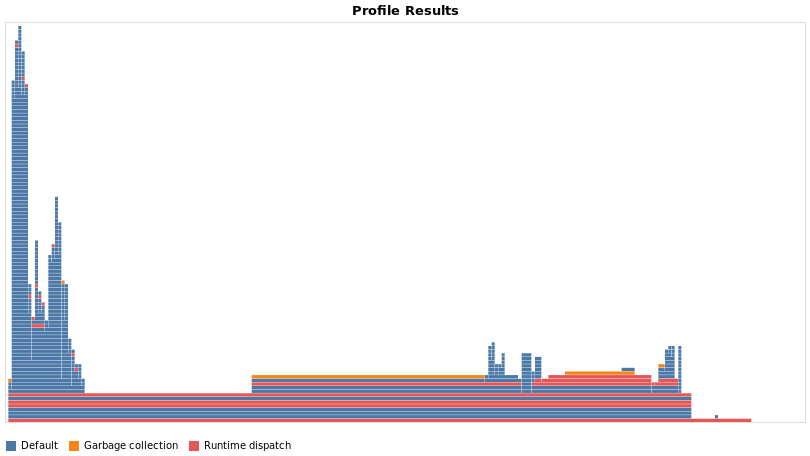

WARN Can not resolve event source: window
WARN Can not resolve event source: window


In [62]:
function profile_test(n)
    for i = 1:n
        A = randn(100,100,20)
        m = maximum(A)
        Am = mapslices(sum, A; dims=2)
        B = A[:,:,5]
        Bsort = mapslices(sort, B; dims=1)
        b = rand(100)
        C = B.*b
    end
end

profile_test(1)   # run once to compile

using Profile, ProfileVega
Profile.clear()
@profview profile_test(10)

# Function arguments

In [65]:
using ExprTools

┌ Info: Precompiling ExprTools [e2ba6199-217a-4e67-a87a-7c52f15ade04]
└ @ Base loading.jl:1242


In [70]:
expr = :(function f(x, y)
    return x + y
end)

:(function f(x, y)
      #= In[70]:2 =#
      return x + y
  end)

In [71]:
splitdef(expr)

Dict{Symbol,Any} with 4 entries:
  :args => Any[:x, :y]
  :body => quote…
  :name => :f
  :head => :function

In [ ]:
splitdef()

In [73]:
splitdef(:())

Dict{Symbol,Any} with 4 entries:
  :args => Any[:x, :y]
  :body => quote…
  :name => :q
  :head => :(=)

In [74]:
q(x, y) = x + y

q (generic function with 1 method)

In [75]:
q

q (generic function with 1 method)

In [78]:
q

q (generic function with 1 method)

q (generic function with 1 method)

# Interval matrices stuff

In [83]:
using Revise, IntervalMatrices

In [84]:
abs(M::IntervalMatrix) = IntervalMatrix(map(abs, M))

abs (generic function with 1 method)

In [92]:
[size(rand(IntervalMatrix, i), 2) for i in 2:5]

4-element Array{Int64,1}:
 2
 2
 2
 2

In [94]:
M = rand(IntervalMatrix)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.08115, 0.404159]     [0.318708, 1.48657]
  [0.0209044, 0.343184]  [-1.11279, 0.369965]

In [98]:
M

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.08115, 0.404159]     [0.318708, 1.48657]
  [0.0209044, 0.343184]  [-1.11279, 0.369965]

In [104]:
methodswith(typeof(M), IntervalMatrices, supertypes=true)

[1] diam(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:278
[2] dot(x::AbstractArray, y::AbstractArray) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:786
[3] expm_overapproximation(A::IntervalMatrix{T,Interval{T},MT} where MT<:AbstractArray{Interval{T},2}, t, p) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/exponential.jl:77
[4] expm_underapproximation(A::IntervalMatrix{T,Interval{T},MT} where MT<:AbstractArray{Interval{T},2}, t, p) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/exponential.jl:155
[5] inf(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:87
[6] isempty(a::AbstractArray) in Base at abstractarray.jl:917
[7] mid(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:123
[8] opnorm(A::IntervalMatrix) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:65
[9] opnorm(A::IntervalMatrix, p::Real) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:65
[10] opnorm(A::AbstractArray{T,2} where T) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:641
[11] opnorm(A::AbstractArray{T,2} where T, p::Real) in LinearAlgebra at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/generic.jl:641
[12] quadratic_expansion(A::IntervalMatrix, t) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/exponential.jl:20
[13] rand(rng::Random.AbstractRNG, range::AbstractArray, ::Type{SA}) where SA<:StaticArrays.StaticArray in StaticArrays at /home/mforets/.julia/packages/StaticArrays/1g9bq/src/arraymath.jl:55
[14] rand(range::AbstractArray, ::Type{SA}) where SA<:StaticArrays.StaticArray in StaticArrays at /home/mforets/.julia/packages/StaticArrays/1g9bq/src/arraymath.jl:56
[15] sample(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:252
[16] square(A::IntervalMatrix) in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/arithmetic.jl:49
[17] sup(A::IntervalMatrix{T,IT,MT} where MT<:AbstractArray{IT,2} where IT<:Interval{T}) where T in IntervalMatrices at /home/mforets/.julia/dev/IntervalMatrices/src/matrix.jl:105

In [106]:
inf(M)

2×2 Array{Float64,2}:
 -1.08114     0.318708
  0.0209045  -1.11278 

In [107]:
M

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.08115, 0.404159]     [0.318708, 1.48657]
  [0.0209044, 0.343184]  [-1.11279, 0.369965]

In [108]:
sup(M)

2×2 Array{Float64,2}:
 0.404159  1.48657 
 0.343183  0.369964

### Comparing different square implementations

In [1]:
using Revise, IntervalMatrices, BenchmarkTools

In [3]:
M = rand(IntervalMatrix, 2)

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
  [0.360505, 1.21019]   [0.0860038, 0.653283]
 [-0.871612, 1.14312]  [-0.784375, -0.281789]

In [10]:
# version in master, using ^
@btime square($M)

  3.540 μs (82 allocations: 3.41 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.38971, 4.40589]  [-2.81811, 1.33693] 
 [-4.33383, 2.05599]  [-0.270361, 3.52899]

In [8]:
# version in master, using pow
@btime square($M)

  187.382 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.38971, 4.40589]  [-2.81811, 1.33693] 
 [-4.33383, 2.05599]  [-0.270361, 3.52899]

In [9]:
# version in mforets/faster_square
@btime square($M)

┌ Warning: /home/mforets/.julia/packages/IntervalArithmetic/r2G4E/src/intervals/powers.jl no longer exists, deleting all methods
└ @ Revise /home/mforets/.julia/packages/Revise/S7mrl/src/Revise.jl:544


  3.506 μs (76 allocations: 2.94 KiB)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.439445, 2.21132]  [-0.276906, 0.606504]
 [-0.8092, 1.06126]    [-0.490004, 1.36202] 

In [8]:
] add IntervalArithmetic#v0.16.3

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %  Updating git-repo `https://github.com/JuliaIntervals/IntervalArithmetic.jl.git`
 Resolving package versions...


┌ Warning: julia version requirement for package ProfileVega not satisfied
└ @ Pkg.Operations /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Pkg/src/Operations.jl:225


  Updating `~/.julia/environments/v1.2/Project.toml`
  [d1acc4aa] ↑ IntervalArithmetic v0.16.1 #nonrecursive_powers (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.3 #v0.16.3 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [d1acc4aa] ↑ IntervalArithmetic v0.16.1 #nonrecursive_powers (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git) ⇒ v0.16.3 #v0.16.3 (https://github.com/JuliaIntervals/IntervalArithmetic.jl.git)


In [7]:
(187 - 131) / 187.

0.2994652406417112

In [6]:
# version in mforets/faster_square using IntervalArithmetic/nonrecursive_powers branch
# it is ~30% faster and it requires A[j, j]^2
@btime square($M)

  131.246 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.439445, 2.21132]  [-0.276906, 0.606504]
 [-0.8092, 1.06126]    [-0.490004, 1.36202] 

In [9]:
using LinearAlgebra: checksquare

function square1(A::IntervalMatrix)
    B = similar(A.mat)
    n = checksquare(A)
    @inbounds for j in 1:n
        for i in 1:n
            if i == j
                res = A[i, i]^2
                for k in 1:n
                    if k != i
                        res += A[i, k] * A[k, i]
                    end
                end
                B[i, i] = res
            else
                res = A[i, j] * (A[i, i] + A[j, j])
                for k in 1:n
                    if k != i && k != j
                        res += A[i, k] * A[k, j]
                    end
                end
                B[i, j] = res
            end
        end
    end
    return IntervalMatrix(B)
end


function square2(A::IntervalMatrix)
    B = similar(A.mat)
    n = checksquare(A)
    @inbounds for j in 1:n
        for i in 1:n
            if i == j
                res = pow(A[i, i], 2)
                for k in 1:n
                    if k != i
                        res += A[i, k] * A[k, i]
                    end
                end
                B[i, i] = res
            else
                res = A[i, j] * (A[i, i] + A[j, j])
                for k in 1:n
                    if k != i && k != j
                        res += A[i, k] * A[k, j]
                    end
                end
                B[i, j] = res
            end
        end
    end
    return IntervalMatrix(B)
end

function square3(A::IntervalMatrix)
    B = similar(A.mat)
    n = checksquare(A)

    # case i == j
    @inbounds for j in 1:n
        B[j, j] = pow(A[j, j], 2)
        for k in 1:n
            k == j && continue
            B[j, j] += A[j, k] * A[k, j]
        end
    end

    # case i ≠ j
    @inbounds for j in 1:n
        for i in 1:n
            i == j && continue
            B[i, j] = A[i, j] * (A[j, j] + A[i, i])
            for k in 1:n
                (k == i || k == j) && continue
                B[i, j] += A[i, k] * A[k, j]
            end
        end
    end
    return IntervalMatrix(B)
end



square3 (generic function with 1 method)

In [13]:
M(n) = rand(IntervalMatrix, n, n)

M (generic function with 1 method)

In [16]:
A = M(2)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  3.618 μs (76 allocations: 2.94 KiB)
  190.431 ns (2 allocations: 160 bytes)
  194.327 ns (2 allocations: 160 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-1.25059, 3.53102]  [-1.03455, 1.7526] 
 [-1.90802, 1.1263]   [-1.24879, 1.62835]

In [17]:
A = M(3)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  5.742 μs (125 allocations: 5.36 KiB)
  477.474 ns (2 allocations: 240 bytes)
  475.337 ns (2 allocations: 240 bytes)


3×3 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.656142, 4.9118]    [-3.45663, 2.06806]   [-1.57504, 3.84137]  
 [-0.639579, 0.603528]  [-0.299172, 3.26549]  [-0.0851205, 1.37173]
 [-1.15943, 1.07962]    [-1.15623, 2.84543]   [-0.83474, 1.50957]  

In [18]:
A = M(4)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  8.151 μs (162 allocations: 6.86 KiB)
  1.062 μs (2 allocations: 352 bytes)
  1.110 μs (2 allocations: 352 bytes)


4×4 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-0.77385, 3.1586]    [-5.96374, 0.463751]  …  [-1.85232, 1.24969]
 [-1.34601, 2.88996]   [-0.85282, 5.00584]       [0.322574, 2.7926]
 [-4.42465, 2.19834]   [-8.98576, 3.36581]      [-3.36595, 1.72967]
  [0.723541, 4.54881]  [-4.84278, 1.07695]      [-1.74098, 1.03039]

In [20]:
A = M(10)
@btime square1($A)
@btime square2($A)
@btime square3($A)

  48.360 μs (408 allocations: 18.55 KiB)
  26.618 μs (2 allocations: 1.78 KiB)
  25.823 μs (2 allocations: 1.78 KiB)


10×10 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [-15.0596, 7.02558]    [-4.05335, 10.4616]  …  [-5.67069, 4.68377]
 [-14.0023, 13.3392]   [-11.1931, 10.7178]      [-8.80499, 4.18572]
 [-11.0766, 12.4657]    [-2.47059, 15.0889]     [-6.76096, 6.49717]
 [-11.1217, 7.7141]     [-7.8687, 6.08828]      [-3.34341, 5.20867]
  [-6.31673, 5.68484]   [-5.70728, 3.2717]      [-2.84294, 3.85157]
  [-7.25568, 13.3479]   [-9.15015, 8.93799]  …  [-6.34515, 4.75675]
  [-3.3215, 15.4359]    [-7.08864, 7.22597]     [-4.08259, 4.63538]
  [-8.03028, 8.93594]   [-3.91559, 5.20142]     [-3.35783, 4.63063]
  [-8.51068, 6.14291]   [-5.65711, 5.8831]      [-2.11419, 4.35483]
 [-10.1633, 12.437]    [-11.4491, 6.8883]       [-6.83925, 6.36304]

In [21]:
(1.110 - 1.062) / 1.110

0.04324324324324328

In [1]:
using IntervalMatrices, BenchmarkTools

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/IntervalMatrices/VerWp.ji for IntervalMatrices [5c1f47dc-42dd-5697-8aaa-4d102d140ba9]
└ @ Base loading.jl:1240


In [2]:
M = [Interval(1) Interval(0, 1); Interval(1) Interval(-1)]

2×2 Array{Interval{Float64},2}:
 [1, 1]    [0, 1]
 [1, 1]  [-1, -1]

In [8]:
M^2

2×2 Array{Interval{Float64},2}:
 [1, 2]  [-1, 1]
 [0, 0]   [1, 2]

In [9]:
@btime $M^2

  140.963 ns (1 allocation: 144 bytes)


2×2 Array{Interval{Float64},2}:
 [1, 2]  [-1, 1]
 [0, 0]   [1, 2]

In [ ]:
@btime square(IntervalMatrix($M))

In [4]:
square(IntervalMatrix(M))

2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 2]  [0, 0]
 [0, 0]  [1, 2]

In [6]:
@btime square(IntervalMatrix($M))

  168.930 ns (3 allocations: 176 bytes)


2×2 IntervalMatrix{Float64,Interval{Float64},Array{Interval{Float64},2}}:
 [1, 2]  [0, 0]
 [0, 0]  [1, 2]

## Approximate Minkowski sum

In [132]:
using LazySets, Polyhedra, Plots, CDDLib

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/CDDLib/SMSjF.ji for CDDLib [3391f64e-dcde-5f30-b752-e11513730f60]
└ @ Base loading.jl:1240


In [135]:
X = [rand(HPolygon, dim=2) for _ in 1:3] |> MinkowskiSumArray;

In [140]:
Xred = convert(HPolytope, reduce(minkowski_sum, array(X)));

HPolytope{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,Array{Float64,1}}([-3.1812828817119136, -1.0], 17.791559527242356), LazySets.HalfSpace{Float64,Array{Float64,1}}([-6.67173514654207, 1.0], 58.33118627110076), LazySets.HalfSpace{Float64,Array{Float64,1}}([-3.7839110251870887, -1.0], 22.136421771249463), LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.099097248589142, -1.0], 10.263576543950858), LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.6767411969641373, -1.0], 14.194606138468192), LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.095415823278109, -1.0], 10.239600379688687), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.8342925862594592, -1.0], 8.637951820834619), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.369623470623105, -1.0], 5.803472485806184), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.1352332802956377, -1.0], 4.4344789672727405), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.0, -1.50541866327323

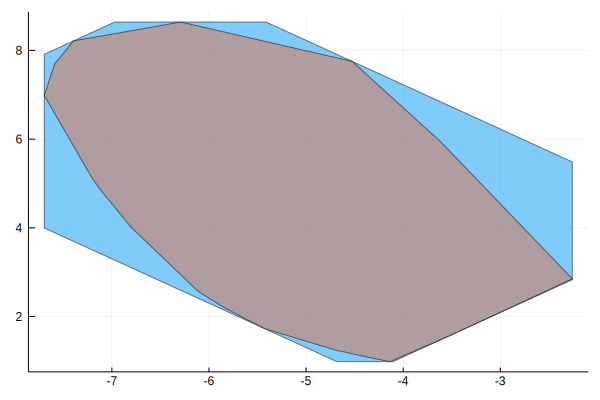

In [141]:
Y = overapproximate(X, OctDirections(2));
plot(Y)
plot!(Xred)

In [ ]:
Y = overapproximate(X, OctDirections(3));
plot(Y)

In [ ]:
Polyhedra
X = [rand(HPolytope, dim=3) for _ in 1:200] |> MinkowskiSumArray;

## Linear map, emptiness

In [2]:
using Revise, LazySets, Plots, Polyhedra

In [3]:
Pv = VPolytope([[0., 0], [1., 0], [1., 1], [0., 1]])

VPolytope{Float64}(Array{Float64,1}[[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])

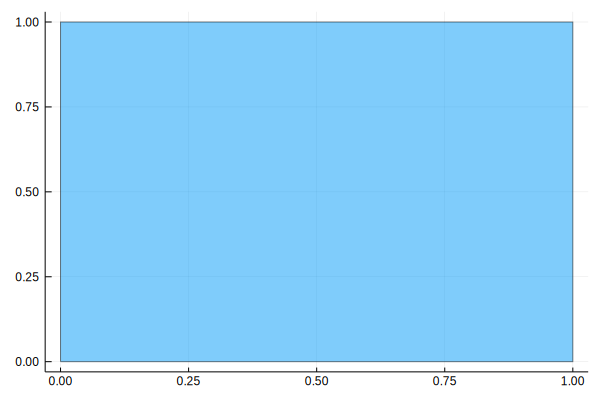

In [4]:
plot(Pv)

In [6]:
Ph = tohrep(Pv)

HPolytope{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], -0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([0.5, -0.0], 0.5), LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.0, -0.0], 0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.0, 0.25], 0.25)])

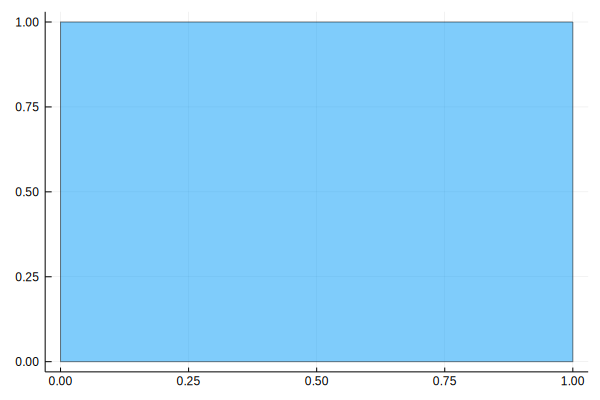

In [7]:
plot(Ph)

In [11]:
M = [1. 0;]

1×2 Array{Float64,2}:
 1.0  0.0

In [14]:
linear_map(M, Pv)

VPolytope{Float64}(Array{Float64,1}[[0.0], [1.0], [1.0], [0.0]])

In [15]:
isempty(linear_map(M, Pv))

false

In [19]:
linear_map(M, Ph, algorithm="vrep")

LazySets.Interval{Float64,IntervalArithmetic.Interval{Float64}}([0, 1])

In [20]:
?linear_map

search: linear_map



```
linear_map(M::AbstractMatrix{N},
           P::AbstractPolyhedron{N};
           [algorithm]::Union{String, Nothing}=nothing,
           [check_invertibility]::Bool=true,
           [cond_tol]::Number=DEFAULT_COND_TOL,
           [inverse]::Union{AbstractMatrix{N}, Nothing}=nothing
          ) where {N<:Real}
```

Concrete linear map of a polyhedral set.

### Input

  * `M`         – matrix
  * `P`         – polyhedral set
  * `algorithm` – (optional; default: `nothing`, see the Notes section below)                algorithm to be used; possible choices are:

      * `"vrep"`     – apply the linear map to each vertex of `P` (note that this                 only works for *polytopes*)
      * `"inverse"`  – compute the matrix inverse and apply it to each constraint                 of `P`
      * `"division"` – divide each constraint of `P` by `M` from the left
  * `check_invertibility` – (optional, deault: `true`) check if the linear map is                          invertible, in which case this function uses the                          matrix inverse; if this flag is set to `false`, we                          assume that the matrix is invertible; otherwise, if                          the invertibility check fails, we fall back to the                          `"vrep"` algorithm; this option is ignored if the                          `"vrep"` algorithm is used
  * `cond_tol`  – (optional; default: `DEFAULT_COND_TOL`) tolerance of matrix                condition (used to check whether the matrix is invertible)
  * `inverse`   – (optional; default: `nothing`) matrix inverse (if known)

### Output

The type of the result is "as close as possible" to the the type of `P`. Let `(m, n)` be the size of `M`, where `m ≠ n` is allowed for rectangular maps.

To fix the type of the output to something different than the default value, consider post-processing the result of this function with a call to a suitable `convert` method.

In particular, the output depends on the type of `P`, on `m`, and the algorithm that was used:

  * If the vertex-based approach was used:

      * If `P` is a `VPolygon` and `m = 2` then the output is a `VPolygon`.
      * If `P` is a `VPolytope` then the output is a `VPolytope`.
      * Otherwise, the output is an `Interval` if `m = 1`, a `VPolygon` if `m = 2` and a `VPolytope` in other cases.
  * If the invertibility criterion was used:

      * The types of `HalfSpace`, `Hyperplane`, `Line` and `AbstractHPolygon` are preserved.
      * If `P` is an `AbstractPolytope`, then the output is an `Interval` if `m = 1`, an `HPolygon` if `m = 2` and an `HPolytope` in other cases.
      * Otherwise, the output is an `HPolyhedron`.

### Notes

If `algorithm` is `nothing` (the default), we determine the algorithm as follows. If `M` is sparse or non-square, and has full row rank (which we check), we use `"division"`. If `M` is dense and square and invertible (either assumed or checked; see option `check_invertibility`), we use `"inverse"`. Otherwise, we use `"vrep"`.

### Algorithm

This function implements two algorithms for the linear map:

  * If the matrix $M$ is invertible (which we check via a sufficient condition), then $y = M x$ implies $x = \text{inv}(M) y$ and we transform the constraint system $A x ≤ b$ to $A \text{inv}(M) y ≤ b$.
  * Otherwise, we transform the polyhedron to vertex representation and apply the map to each vertex, returning a polyhedron in vertex representation.

Note that the vertex representation (second approach) is only available if the polyhedron is bounded, which we check.

If the matrix is known to be invertible, the the option `check_invertibility` can be used to skip the invertibility test. Note that we only check for invertibility if the `algorithm` is either unspecified or specified as `"inverse"`. If the matrix inverse is even known, it can be specified with the option `inverse`, in which case we ignore the other options and also the original matrix `M`.

The algorithms `"division"` and `"inverse"` give control about whether the full matrix inverse is computed or only the left division on the normal vectors is used. Note that this helps as a workaround when `M` is sparse (since the `inv` function is not available for sparse matrices) or rectangular. For sparse and invertible matrices, either use the algorithm `"division"` or convert `M` to a dense matrix (as in `linear_map(Matrix(M), P)`).

Internally, this function operates on the level of the `AbstractPolyhedron` interface, but the actual algorithm uses dispatch on the concrete type of `P`, depending on the algorithm that is used:

  * `_linear_map_vrep(M, P)` if the vertex approach is used
  * `_linear_map_hrep(M, P, use_inv)` if the invertibility criterion is used, where `use_inv` is determined by the algorithm

New subtypes of the interface should define their own `_linear_map_vrep` (resp. `_linear_map_hrep`) for special handling of the linear map; otherwise the fallback implementation for `AbstractPolyhedron` is used.

---

```
linear_map(M::AbstractMatrix{N}, Z::AbstractZonotope{N}) where {N<:Real}
```

Concrete linear map of a zonotopic set.

### Input

  * `M` – matrix
  * `Z` – zonotopic set

### Output

The zonotope obtained by applying the linear map to the center and generators of $Z$.

---

```
linear_map(M::AbstractMatrix{N}, S::AbstractSingleton{N}) where {N<:Real}
```

Concrete linear map of an abstract singleton.

### Input

  * `M` – matrix
  * `S` – abstract singleton

### Output

The abstract singleton of the same type of $S$ obtained by applying the linear map to the element in $S$.

---

```
linear_map(M::AbstractMatrix{N}, ∅::EmptySet{N}) where {N}
```

Return the linear map of an empty set.

### Input

  * `M` – matrix
  * `∅` – empty set

### Output

The empty set.

---

```
linear_map(M::AbstractMatrix{N}, x::Interval{N}) where {N<:Real}
```

Concrete linear map of an interval.

### Input

  * `M` – matrix
  * `x` – interval

### Output

Either an interval or a zonotope, depending on the leading dimension (i.e. the number of rows) of `M`:

  * If `size(M, 1) == 1`, the output is an interval obtained by scaling `x` by the matrix `M`.
  * If `size(M, 1) > 1`, the output is a zonotope whose center is `M * center(x)` and it has the single generator, `M * g`, where `g = (high(x)-low(x))/2`.

---

```
linear_map(M::AbstractMatrix{N}, P::VPolytope{N}) where {N<:Real}
```

Concrete linear map of a polytope in vertex representation.

### Input

  * `M` – matrix
  * `P` – polytope in vertex representation

### Output

A polytope in vertex representation.

### Algorithm

The linear map $M$ is applied to each vertex of the given set $P$, obtaining a polytope in V-representation. The output type is again a `VPolytope`.

---

```
linear_map(M::AbstractMatrix{N}, Z::ZeroSet{N}) where {N<:Real}
```

Concrete linear map of a zero set.

### Input

  * `M` – matrix
  * `Z` – zero set

### Output

The zero set whose dimension matches the output dimension of the given matrix.

---

```
linear_map(M::Matrix, pz::PolynomialZonotope)
```

Return the linear map of a polynomial zonotope.

### Input

  * `M`  – matrix
  * `pz` – polynomial zonotope

## Output

Polynomial zonotope such that its starting point and generators are those of `pz` multiplied by the matrix `M`.

---

```
linear_map(M::AbstractMatrix{N}, cp::CartesianProduct{N}) where {N<:Real}
```

Concrete linear map of a (polyhedral) Cartesian product.

### Input

  * `M`  – matrix
  * `cp` – Cartesian product of two convex sets

### Output

A polytope.

### Algorithm

We check if the matrix is invertible. If so, we convert the Cartesian product to constraint representation. Otherwise, we convert the Cartesian product to vertex representation. In both cases, we then call `linear_map` on the resulting polytope.

---

linear_map(M::AbstractMatrix{N}, cpa::CartesianProductArray{N}              ) where {N<:Real}

Concrete linear map of a Cartesian product of a finite number of convex sets.

### Input

  * `M`   – matrix
  * `cpa` – Cartesian product of a finite number of convex sets

### Output

A polytope.

### Algorithm

We check if the matrix is invertible. If so, we convert the Cartesian product to constraint representation. Otherwise, we convert the Cartesian product to vertex representation. In both cases, we then call `linear_map` on the resulting polytope.

---

```
linear_map(M::AbstractMatrix{N}, cap::Intersection{N}) where {N}
```

Return the concrete linear map of a lazy intersection.

### Input

  * `M`   – matrix
  * `cap` – lazy intersection

### Output

The set obtained by applying the given linear map to the lazy intersection.

### Notes

This function relies on computing `cap` concretely (i.e. as a set representation), and then applying the linear map.

---

```
linear_map(M::AbstractMatrix{N}, lm::LinearMap{N}) where {N<:Real}
```

Return the linear map of a lazy linear map.

### Input

  * `M`  – matrix
  * `lm` – linear map

### Output

The polytope representing the linear map of the lazy linear map of a set.

---

```
linear_map(M::AbstractMatrix{N}, am::AffineMap{N}) where {N<:Real}
```

Return the linear map of a lazy affine map.

### Input

  * `M`  – matrix
  * `am` – affine map

### Output

A set corresponding to the linear map of the lazy affine map of a set.

---

```
linear_map(M::AbstractMatrix{N}, tr::Translation{N}) where {N<:Real}
```

Concrete linear map of a polyhedron in constraint representation.

### Input

  * `M`  – matrix
  * `tr` – translation of a convex set

### Output

A concrete set corresponding to the linear map. The type of the result depends on the type of the set wrapped by `tr`.

### Algorithm

We compute `translate(linear_map(M, tr.X), M * tr.v)`.


In [258]:
import Polyhedra
using LazySets

B = [
    -0.0 -0.0 -1.0 -0.0;
    -0.0 -0.0 -0.0 -1.0;
    0.0 0 1 0;
    0.0 0 0 1;
    3 -1 0 0;
    3 1.0 0 0;
    -3 -1.0 0.0 0;
    -2 1.0 0 0;
    -3 1.0 0 0;
    4 -1 0 0
]
b = [
    0.0,
    0.0,
    -0.0,
    -0.0,
    -1.0,
    4,
    -3,
    2,
    2.,
    -1.0
]
P = HPolytope(B, b)
@assert !isempty(P)
@assert isbounded(P, false)

M = [1 0 0 0;
     0 1 0 0;
     0 0 1. 1.]
M = ones(3, 4)

@assert !isempty(linear_map(M, P; algorithm="vrep"))
@assert !isempty(linear_map(M, P; algorithm="division"))

AssertionError: AssertionError: !(isempty(linear_map(M, P; algorithm="division")))

InterruptException: InterruptException:

In [212]:
vertices_list(P)

8-element Array{Array{Float64,1},1}:
 [0.4291514000666398, 2.0721084877733493, 0.0, 0.0] 
 [0.37923626206663974, 2.8330655877733495, 0.0, 0.0]
 [0.33955216606615707, 2.344809927774846, 0.0, 0.0] 
 [0.3150276300666387, 2.658708627773354, 0.0, 0.0]  
 [0.27697989006663654, 2.540095287773358, 0.0, 0.0] 
 [0.4688354960666816, 2.5603641477731944, 0.0, 0.0] 
 [0.4933600320666409, 2.246465447773348, 0.0, 0.0]  
 [0.5314077720666409, 2.365078787773344, 0.0, 0.0]  

In [216]:
@assert !isempty(linear_map(M, P; algorithm="vrep"))
@assert !isempty(linear_map(M, P; algorithm="division"))

AssertionError: AssertionError: !(isempty(linear_map(M, P; algorithm="division")))

In [143]:
convex_hull(vertices_list(P))

8-element Array{Array{Float64,1},1}:
 [0.4291514000666398, 2.0721084877733493, 0.0, 0.0] 
 [0.37923626206663974, 2.8330655877733495, 0.0, 0.0]
 [0.33955216606615707, 2.344809927774846, 0.0, 0.0] 
 [0.3150276300666387, 2.658708627773354, 0.0, 0.0]  
 [0.27697989006663654, 2.540095287773358, 0.0, 0.0] 
 [0.4688354960666816, 2.5603641477731944, 0.0, 0.0] 
 [0.4933600320666409, 2.246465447773348, 0.0, 0.0]  
 [0.5314077720666409, 2.365078787773344, 0.0, 0.0]  

In [23]:
@assert !isempty(linear_map(M, P; algorithm="vrep"))

In [35]:
linear_map(M, P; algorithm="inverse")

ArgumentError: ArgumentError: algorithm "inverse" requires an invertible matrix

In [26]:
typeof(P)

HPolytope{Float64}

In [27]:
M

3×4 Array{Float64,2}:
 -0.366503   1.64183   -0.649788  -1.50732 
 -0.386102  -1.05134   -1.08367   -0.623644
  0.418874  -0.309237   1.61043    1.76039 

In [408]:
M0 = [
    -0.36650336 1.6418293 -0.6497878 -1.5073241;
    -0.3861024 -1.0513428 -1.083672 -0.6236442;
    0.41887435 -0.30923694 1.6104311 1.7603866
]

3×4 Array{Float64,2}:
 -0.366503   1.64183   -0.649788  -1.50732 
 -0.386102  -1.05134   -1.08367   -0.623644
  0.418874  -0.309237   1.61043    1.76039 

In [409]:
hasfullrowrank(M0)

true

In [24]:
@assert !isempty(linear_map(M, P; algorithm="division"))

AssertionError: AssertionError: !(isempty(linear_map(M, P; algorithm="division")))

In [34]:
linear_map(M, P; algorithm="division")

HPolytope{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,Array{Float64,1}}([-1.0663772827223938, -1.0325576246178827, -1.5138591262240768], 0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([0.23459199124494973, 0.17251606449644133, -0.04611605293775892], 0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([1.0663772827223938, 1.0325576246178827, 1.5138591262240768], -0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.23459199124494973, -0.17251606449644133, 0.04611605293775892], -0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([-9.165347872002974, -10.346178446994061, -11.084049123098309], -1.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([-9.008598985999505, -11.718774102437951, -11.691788662127019], 3.98729727200628), LazySets.HalfSpace{Float64,Array{Float64,1}}([9.008598985998264, 11.71877410243644, 11.691788662125461], -3.3782603325110476), LazySets.HalfSpace{Float64,Array{Float64,1}}([8.310756377645784, 9.38148444700

In [28]:
linear_map(rand(4, 4), P)

HPolytope{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.6956641553308758, -0.3198382624391515, 2.9240069291759547, -2.012782566521208], 0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([2.100148507578851, -1.6429541163824397, 0.0031824099195121814, 0.004094825894221877], 0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([0.6956641553308758, 0.3198382624391515, -2.9240069291759547, 2.012782566521208], -0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.100148507578851, 1.6429541163824397, -0.0031824099195121814, -0.004094825894221877], -0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([1.7404975818010018, 2.9303469642257354, 0.5532705249522016, -5.286667661025822], -1.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([4.776090744579629, -2.66556564477014, 7.3880207579255845, -5.033810229260657], 3.98729727200628), LazySets.HalfSpace{Float64,Array{Float64,1}}([-4.776090744579173, 2.6655656447701395, -7.

In [36]:
using SparseArrays

In [127]:
P = rand(HPolytope, dim=3);

In [128]:
zeros(3) ∈ P

true

In [129]:
isbounded(P, false)

true

In [130]:
M = Matrix(sprandn(2, 3, 0.2))

2×3 Array{Float64,2}:
 0.0   0.0       0.0
 0.0  -0.409103  0.0

In [131]:
isempty(linear_map(M, P, algorithm="division"))

false

In [132]:
isempty(linear_map(M, P, algorithm="vrep"))

false

In [403]:
A = [0 0 1.;
     0 0 -1;
     1 0 0;
    -1 0 0;
     0 1 0;
     0 -1 0]

b = [0;
     0;
     1;
     0.;
     1;
     -0.5
     ];

P = HPolytope(A, b);

M = [1 1 1;
     1 1 1.]

@assert !isempty(P)

In [404]:
vertices_list(P)

4-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 0.0]
 [0.0, 1.0, 0.0]
 [1.0, 0.5, 0.0]
 [0.0, 0.5, 0.0]

In [405]:
isempty(linear_map(M, P))

false

In [406]:
isempty(linear_map(M, P, algorithm="division"))

true

In [396]:
using LinearAlgebra

In [397]:
using LazySets.Arrays

In [398]:
hasfullrowrank(M)

false

search: \



```
\(x, y)
```

Left division operator: multiplication of `y` by the inverse of `x` on the left. Gives floating-point results for integer arguments.

# Examples

```jldoctest
julia> 3 \ 6
2.0

julia> inv(3) * 6
2.0

julia> A = [4 3; 2 1]; x = [5, 6];

julia> A \ x
2-element Array{Float64,1}:
  6.5
 -7.0

julia> inv(A) * x
2-element Array{Float64,1}:
  6.5
 -7.0
```

---

```
\(A, B)
```

Matrix division using a polyalgorithm. For input matrices `A` and `B`, the result `X` is such that `A*X == B` when `A` is square. The solver that is used depends upon the structure of `A`.  If `A` is upper or lower triangular (or diagonal), no factorization of `A` is required and the system is solved with either forward or backward substitution. For non-triangular square matrices, an LU factorization is used.

For rectangular `A` the result is the minimum-norm least squares solution computed by a pivoted QR factorization of `A` and a rank estimate of `A` based on the R factor.

When `A` is sparse, a similar polyalgorithm is used. For indefinite matrices, the `LDLt` factorization does not use pivoting during the numerical factorization and therefore the procedure can fail even for invertible matrices.

# Examples

```jldoctest
julia> A = [1 0; 1 -2]; B = [32; -4];

julia> X = A \ B
2-element Array{Float64,1}:
 32.0
 18.0

julia> A * X == B
true
```

---

```
(\)(F::QRSparse, B::StridedVecOrMat)
```

Solve the least squares problem $\min\|Ax - b\|^2$ or the linear system of equations $Ax=b$ when `F` is the sparse QR factorization of $A$. A basic solution is returned when the problem is underdetermined.

# Examples

```jldoctest
julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
4×2 SparseMatrixCSC{Float64,Int64} with 3 stored entries:
  [1, 1]  =  1.0
  [2, 1]  =  1.0
  [4, 1]  =  1.0

julia> qr(A)\fill(1.0, 4)
2-element Array{Float64,1}:
 1.0
 0.0
```

---

```
\(X::LazySet, Y::LazySet)
```

Convenience alias for set difference.

### Input

  * `X` – a set
  * `Y` – another set

### Output

The set difference between `X` and `Y`.

### Notes

If `X` and `Y` are intervals, `X \ Y` is used in some libraries to denote the left division, as the example below shows. However, it should not be confused with the *set difference*. For example,

```julia
julia> X = Interval(0, 2); Y = Interval(1, 4);

julia> X \ Y   # computing the set difference
LazySets.Interval{Float64,IntervalArithmetic.Interval{Float64}}([0, 1])

julia> X.dat \ Y.dat  # computing the left division
[0.5, ∞]
```

---

(P::Union{AbstractMatrix, UniformScaling}, p::HRep)

Transform the polyhedron represented by $p$ into $P^{-1} p$ by transforming each halfspace $\langle a, x \rangle \le \beta$ into $\langle P^\top a, x \rangle \le \beta$ and each hyperplane $\langle a, x \rangle = \beta$ into $\langle P^\top a, x \rangle = \beta$.


In [383]:
vertices_list(P)

4-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 0.0]
 [0.0, 1.0, 0.0]
 [1.0, 0.5, 0.0]
 [0.0, 0.5, 0.0]

In [386]:
H = Hyperrectangle(low=[0, 0.5, 0], high=[1, 1, 0.])
@show isempty(H)
@show vertices_list(H)

M = ones(2, 3)

MH = linear_map(M, H)

@show vertices_list(MH);

P = convert(HPolytope, H)
@show isempty(P)
@show vertices_list(P)

MP_div = linear_map(M, P, algorithm="division")
@show isempty(MP_div) # should give false!

MP_vrep = linear_map(M, P, algorithm="vrep")
@show isempty(MP_vrep)
@show vertices_list(MP_vrep)

isempty(H) = false
vertices_list(H) = Array{Float64,1}[[1.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.5, 0.0], [0.0, 0.5, 0.0]]
vertices_list(MH) = Array{Float64,1}[[0.5, 0.5], [2.0, 2.0]]
isempty(P) = false
vertices_list(P) = Array{Float64,1}[[1.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.5, 0.0], [0.0, 0.5, 0.0]]
isempty(MP_div) = true
isempty(MP_vrep) = false
vertices_list(MP_vrep) = Array{Float64,1}[[0.5, 0.5], [2.0, 2.0]]


2-element Array{Array{Float64,1},1}:
 [0.5, 0.5]
 [2.0, 2.0]

In [361]:
vertices_list(MH)

2-element Array{Array{Float64,1},1}:
 [0.5, 0.5]
 [2.0, 2.0]

In [362]:
P = convert(HPolytope, H)

HPolytope{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([1.0, 0.0, 0.0], 1.0), LazySets.HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([0.0, 1.0, 0.0], 1.0), LazySets.HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([0.0, 0.0, 1.0], 0.0), LazySets.HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([-1.0, 0.0, 0.0], -0.0), LazySets.HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([0.0, -1.0, 0.0], -0.5), LazySets.HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([0.0, 0.0, -1.0], -0.0)])

In [363]:
linear_map(M, P)

VPolygon{Float64,Array{Float64,1}}(Array{Float64,1}[[0.5, 0.5], [2.0, 2.0]])

In [368]:
MP = linear_map(M, P, algorithm="division")

HPolytope{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,Array{Float64,1}}([0.16666666666666663, 0.1666666666666666], 1.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([0.16666666666666663, 0.1666666666666666], 1.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([0.16666666666666663, 0.1666666666666666], 0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.16666666666666663, -0.1666666666666666], -0.0), LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.16666666666666663, -0.1666666666666666], -0.5), LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.16666666666666663, -0.1666666666666666], -0.0)])

In [372]:
constraints_list(MP)

6-element Array{LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1},1}:
 LazySets.HalfSpace{Float64,Array{Float64,1}}([0.16666666666666663, 0.1666666666666666], 1.0)   
 LazySets.HalfSpace{Float64,Array{Float64,1}}([0.16666666666666663, 0.1666666666666666], 1.0)   
 LazySets.HalfSpace{Float64,Array{Float64,1}}([0.16666666666666663, 0.1666666666666666], 0.0)   
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.16666666666666663, -0.1666666666666666], -0.0)
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.16666666666666663, -0.1666666666666666], -0.5)
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.16666666666666663, -0.1666666666666666], -0.0)

In [305]:
[Vector(P.constraints[i].a) for i in eachindex(P.constraints)]

6-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0] 
 [0.0, 1.0, 0.0] 
 [-1.0, 0.0, 0.0]
 [0.0, -1.0, 0.0]
 [0.0, 0.0, 1.0] 
 [0.0, 0.0, -1.0]

In [306]:
[P.constraints[i].b for i in eachindex(P.constraints)]

6-element Array{Float64,1}:
  1.0
  1.0
  1.0
  1.0
  0.0
 -0.0

In [307]:
isempty(linear_map(M, P, algorithm="division"))

false

In [308]:
isempty(linear_map(M, P))

false

In [200]:
isempty(ans)

true

In [201]:
isempty(linear_map(M, P, algorithm="division"))

true

In [202]:
vertices_list(linear_map(M, P))

0-element Array{Array{Float64,1},1}

In [203]:
vertices_list(linear_map(M, P, algorithm="division"))

0-element Array{Array{Float64,1},1}

In [252]:
B = [
    -0.0 -0.0 -1.0 -0.0;
    -0.0 -0.0 -0.0 -1.0;
    0.0 0.0 1.0 0.0;
    0.0 0.0 0.0 1.0;
    2.9947065529531898 -1.1028295687569036 -0.0 -0.0;
    3.04356887693959 1.0 -0.0 -0.0;
    -3.043568876939177 -1.0 -0.0 -0.0;
    -2.7154753896639945 1.0 -0.0 -0.0;
    -3.1209566358111682 -1.0 -0.0 -0.0;
    -3.117487135897941 1.0 -0.0 -0.0;
    3.1209566358106873 1.0 -0.0 -0.0;
    4.400608112720001 -1.4115882186157707 -0.0 -0.0
]
b = [
    0.0,
    0.0,
    -0.0,
    -0.0,
    -1.0,
    3.98729727200628,
    -3.3782603325110476,
    1.803258851263224,
    -3.4045375136630747,
    1.6766140435881927,
    4.0235794003261,
    -1.0
]
P = HPolytope(B, b)
@assert !isempty(P)
@assert isbounded(P, false)

M = [
    -0.36650336 1.6418293 -0.6497878 -1.5073241;
    -0.3861024 -1.0513428 -1.083672 -0.6236442;
    0.41887435 -0.30923694 1.6104311 1.7603866
]

@assert !isempty(linear_map(M, P; algorithm="vrep"))
@assert !isempty(linear_map(M, P; algorithm="division"))

AssertionError: AssertionError: !(isempty(linear_map(M, P; algorithm="division")))

In [232]:
remove_redundant_constraints(P).constraints

12-element Array{LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1},1}:
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.0, -0.0, -1.0, -0.0], 0.0)                               
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.0, -0.0, -0.0, -1.0], 0.0)                               
 LazySets.HalfSpace{Float64,Array{Float64,1}}([0.0, 0.0, 1.0, 0.0], -0.0)                                  
 LazySets.HalfSpace{Float64,Array{Float64,1}}([0.0, 0.0, 0.0, 1.0], -0.0)                                  
 LazySets.HalfSpace{Float64,Array{Float64,1}}([2.9947065529531898, -1.1028295687569036, -0.0, -0.0], -1.0) 
 LazySets.HalfSpace{Float64,Array{Float64,1}}([3.04356887693959, 1.0, -0.0, -0.0], 3.98729727200628)       
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-3.043568876939177, -1.0, -0.0, -0.0], -3.3782603325110476) 
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.7154753896639945, 1.0, -0.0, -0.0], 1.803258851263224)   
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-3

In [233]:
P.constraints

12-element Array{LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1},1}:
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.0, -0.0, -1.0, -0.0], 0.0)                               
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-0.0, -0.0, -0.0, -1.0], 0.0)                               
 LazySets.HalfSpace{Float64,Array{Float64,1}}([0.0, 0.0, 1.0, 0.0], -0.0)                                  
 LazySets.HalfSpace{Float64,Array{Float64,1}}([0.0, 0.0, 0.0, 1.0], -0.0)                                  
 LazySets.HalfSpace{Float64,Array{Float64,1}}([2.9947065529531898, -1.1028295687569036, -0.0, -0.0], -1.0) 
 LazySets.HalfSpace{Float64,Array{Float64,1}}([3.04356887693959, 1.0, -0.0, -0.0], 3.98729727200628)       
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-3.043568876939177, -1.0, -0.0, -0.0], -3.3782603325110476) 
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-2.7154753896639945, 1.0, -0.0, -0.0], 1.803258851263224)   
 LazySets.HalfSpace{Float64,Array{Float64,1}}([-3

In [251]:
M0 = [
    -0.36650336 1.6418293 -0.6497878 -1.5073241;
    -0.3861024 -1.0513428 -1.083672 -0.6236442;
    0.41887435 -0.30923694 1.6104311 1.7603866
]

3×4 Array{Float64,2}:
 -0.366503   1.64183   -0.649788  -1.50732 
 -0.386102  -1.05134   -1.08367   -0.623644
  0.418874  -0.309237   1.61043    1.76039 

In [412]:
H = Hyperrectangle(low=[0, 0.5, 0], high=[1, 1, 0.])
M = ones(2, 3)
P = convert(HPolyhedron, H)

HPolyhedron{Float64}(LazySets.HalfSpace{Float64,VN} where VN<:AbstractArray{Float64,1}[LazySets.HalfSpace{Float64,SingleEntryVector{Float64}}([1.0, 0.0, 0.0], 1.0), LazySets.HalfSpace{Float64,SingleEntryVector{Float64}}([0.0, 1.0, 0.0], 1.0), LazySets.HalfSpace{Float64,SingleEntryVector{Float64}}([0.0, 0.0, 1.0], 0.0), LazySets.HalfSpace{Float64,SingleEntryVector{Float64}}([-1.0, 0.0, 0.0], -0.0), LazySets.HalfSpace{Float64,SingleEntryVector{Float64}}([0.0, -1.0, 0.0], -0.5), LazySets.HalfSpace{Float64,SingleEntryVector{Float64}}([0.0, 0.0, -1.0], -0.0)])

In [418]:
using CDDLib

P_cdd = polyhedron(P, backend=LazySets.default_cddlib_backend(Float64))

Polyhedron CDDLib.Polyhedron{Float64}:
6-element iterator of Polyhedra.HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([1.0, 0.0, 0.0], 1.0)
 HalfSpace([0.0, 1.0, 0.0], 1.0)
 HalfSpace([0.0, 0.0, 1.0], 0.0)
 HalfSpace([-1.0, 0.0, 0.0], -0.0)
 HalfSpace([0.0, -1.0, 0.0], -0.5)
 HalfSpace([0.0, 0.0, -1.0], -0.0)

In [498]:
H = Hyperrectangle(low=[0, 0.5, 0], high=[1, 1, 0.])
@show isempty(H)
@show vertices_list(H)

M = ones(2, 3)

MH = linear_map(M, H)

@show vertices_list(MH);

P = convert(HPolytope, H)
@show isempty(P)
@show vertices_list(P)

MP_div = linear_map(M, P, algorithm="division")
@show isempty(MP_div) # should give false!

MP_vrep = linear_map(M, P, algorithm="vrep")
@show isempty(MP_vrep)
@show vertices_list(MP_vrep)

# iterator over halfspaces, for Ax <= b
id_out = Matrix(1.0I, size(M, 1), size(M, 1))
Ax_leq_b = [Polyhedra.HalfSpace(vcat(zeros(2), c.a), c.b) for c in constraints_list(P)]
y_eq_Mx = [Polyhedra.HyperPlane(vcat(-id_out[i, :], M[i, :]), 0.0) for i in 1:size(M, 1)];

isempty(H) = false
vertices_list(H) = Array{Float64,1}[[1.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.5, 0.0], [0.0, 0.5, 0.0]]
vertices_list(MH) = Array{Float64,1}[[0.5, 0.5], [2.0, 2.0]]
isempty(P) = false
vertices_list(P) = Array{Float64,1}[[1.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.5, 0.0], [0.0, 0.5, 0.0]]
isempty(MP_div) = true
isempty(MP_vrep) = false
vertices_list(MP_vrep) = Array{Float64,1}[[0.5, 0.5], [2.0, 2.0]]


In [520]:
gr()

Plots.GRBackend()

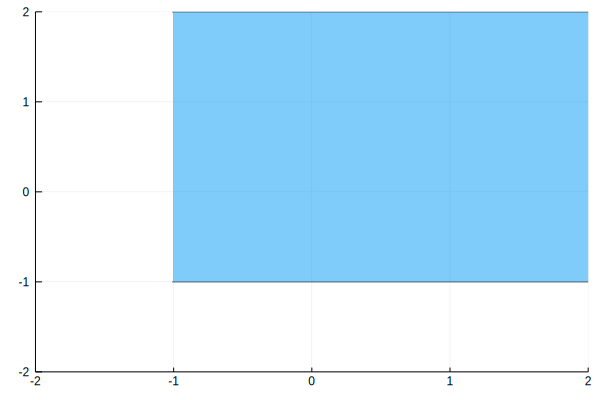

In [522]:
H1 = LazySets.HalfSpace([1.0, 1.0], 4.)
#plot(H1, xlims=(-10, 10), ylims=(-10, 10), alpha=1)
H2 = LazySets.HalfSpace([-1/2., -1/2], -1/2.)
#plot!(H2, xlims=(-10, 10), ylims=(-10, 10))

plot(H1 ∩ H2, xlims = (-2, 2), ylims = (-2, 2))

In [499]:
Phrep = Polyhedra.hrep(y_eq_Mx, Ax_leq_b)

H-representation Polyhedra.Intersection{Float64,Array{Float64,1},Int64}:
2-element iterator of HyperPlane{Float64,Array{Float64,1}}:
 HyperPlane([-1.0, -0.0, 1.0, 1.0, 1.0], 0.0)
 HyperPlane([-0.0, -1.0, 1.0, 1.0, 1.0], 0.0),
6-element iterator of Polyhedra.HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([0.0, 0.0, 1.0, 0.0, 0.0], 1.0)
 HalfSpace([0.0, 0.0, 0.0, 1.0, 0.0], 1.0)
 HalfSpace([0.0, 0.0, 0.0, 0.0, 1.0], 0.0)
 HalfSpace([0.0, 0.0, -1.0, 0.0, 0.0], -0.0)
 HalfSpace([0.0, 0.0, 0.0, -1.0, 0.0], -0.5)
 HalfSpace([0.0, 0.0, 0.0, 0.0, -1.0], -0.0)

In [500]:
Phrep_cdd = polyhedron(Phrep, CDDLib.Library(:float))

Polyhedron CDDLib.Polyhedron{Float64}:
2-element iterator of HyperPlane{Float64,Array{Float64,1}}:
 HyperPlane([-1.0, -0.0, 1.0, 1.0, 1.0], 0.0)
 HyperPlane([-0.0, -1.0, 1.0, 1.0, 1.0], 0.0),
6-element iterator of Polyhedra.HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([0.0, 0.0, 1.0, 0.0, 0.0], 1.0)
 HalfSpace([0.0, 0.0, 0.0, 1.0, 0.0], 1.0)
 HalfSpace([0.0, 0.0, 0.0, 0.0, 1.0], 0.0)
 HalfSpace([0.0, 0.0, -1.0, 0.0, 0.0], -0.0)
 HalfSpace([0.0, 0.0, 0.0, -1.0, 0.0], -0.5)
 HalfSpace([0.0, 0.0, 0.0, 0.0, -1.0], -0.0)

In [501]:
Peli_fm = Polyhedra.eliminate(Phrep_cdd, 3:5, Polyhedra.FourierMotzkin())

ErrorException: Cannot handle linearity

In [502]:
Peli_block = Polyhedra.eliminate(Phrep_cdd, 3:5, Polyhedra.BlockElimination())

Polyhedron CDDLib.Polyhedron{Float64}:
1-element iterator of HyperPlane{Float64,Array{Float64,1}}:
 HyperPlane([1.0, -1.0], 0.0),
5-element iterator of Polyhedra.HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([-0.0, -0.0], 1.0)
 HalfSpace([1.0, -0.0], 2.0)
 HalfSpace([-1.0, -0.0], -0.5)
 HalfSpace([-0.0, -0.0], 0.5)
 HalfSpace([-0.0, -0.0], 0.0)

In [503]:
Peli_block = Polyhedra.removeduplicates(hrep(Peli_block))

H-representation CDDInequalityMatrix{Float64,Float64}:
1-element iterator of HyperPlane{Float64,Array{Float64,1}}:
 HyperPlane([1.0, -1.0], 0.0),
3-element iterator of Polyhedra.HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([-0.0, 0.0], 1.0)
 HalfSpace([0.5, 0.5], 2.0)
 HalfSpace([-0.5, -0.5], -0.5)

In [525]:
vertices_list(convert(HPolytope, convert(HPolyhedron, Peli_block)))

2-element Array{Array{Float64,1},1}:
 [0.5, 0.5]
 [2.0, 2.0]

In [528]:
convert(HPolyhedron, Peli_block) ⊆ MH

true

### Back to the OP

In [562]:
B = [
    -0.0 -0.0 -1.0 -0.0;
    -0.0 -0.0 -0.0 -1.0;
    0.0 0.0 1.0 0.0;
    0.0 0.0 0.0 1.0;
    2.9947065529531898 -1.1028295687569036 -0.0 -0.0;
    3.04356887693959 1.0 -0.0 -0.0;
    -3.043568876939177 -1.0 -0.0 -0.0;
    -2.7154753896639945 1.0 -0.0 -0.0;
    -3.1209566358111682 -1.0 -0.0 -0.0;
    -3.117487135897941 1.0 -0.0 -0.0;
    3.1209566358106873 1.0 -0.0 -0.0;
    4.400608112720001 -1.4115882186157707 -0.0 -0.0
]
b = [
    0.0,
    0.0,
    -0.0,
    -0.0,
    -1.0,
    3.98729727200628,
    -3.3782603325110476,
    1.803258851263224,
    -3.4045375136630747,
    1.6766140435881927,
    4.0235794003261,
    -1.0
]
P = HPolytope(B, b)

M = [
    -0.36650336 1.6418293 -0.6497878 -1.5073241;
    -0.3861024 -1.0513428 -1.083672 -0.6236442;
    0.41887435 -0.30923694 1.6104311 1.7603866
]

id_out = Matrix(1.0I, size(M, 1), size(M, 1))
Bx_leq_b = [Polyhedra.HalfSpace(vcat(zeros(size(M, 1)), c.a), c.b) for c in constraints_list(P)]
y_eq_Mx = [Polyhedra.HyperPlane(vcat(-id_out[i, :], M[i, :]), 0.0) for i in 1:size(M, 1)];

Phrep = Polyhedra.hrep(y_eq_Mx, Bx_leq_b)
Phrep_cdd = polyhedron(Phrep, CDDLib.Library(:float))
Peli_block = Polyhedra.eliminate(Phrep_cdd, 4:7, Polyhedra.BlockElimination())
Peli_block = Polyhedra.removeduplicates(hrep(Peli_block))

H-representation CDDInequalityMatrix{Float64,Float64}:
1-element iterator of HyperPlane{Float64,Array{Float64,1}}:
 HyperPlane([1.0, 1.0260927645971674, 1.8207852522686132], 0.0),
21-element iterator of Polyhedra.HalfSpace{Float64,Array{Float64,1}}:
 HalfSpace([-2.8708160066254553, -4.320470238465383, 4.011466617972513], -1.0)
 HalfSpace([-1.6647329887923998, -4.919606822701422, 3.6867093172385204], 5.226304158676976)
 HalfSpace([-1.6815574203631947, -5.018922009618974, 3.7519180100997964], 5.404963399020829)
 HalfSpace([-2.007262871509015, -2.8887650925823944, 2.7303625320089466], -1.0)
 HalfSpace([1.8603040344338595, 5.552424645116776, -4.15074033543646], -5.066166766119807)
 HalfSpace([1.8201025148169965, 2.619412078185851, -2.4757792222478443], 1.803258851263224)
 HalfSpace([1.8416911951995019, 5.442552427452348, -4.0786000725216525], -4.892292954589807)
 HalfSpace([2.0337489140002205, 3.0607157112021266, -2.841810780983991], 1.6766140435881927)
 HalfSpace([1.0630283422812639, 6.27

In [563]:
vertices_list(convert(HPolytope, Peli_block))

8-element Array{Array{Float64,1},1}:
 [3.68829291658222, -2.6916863711318166, -0.508776642080575]   
 [4.031851091887482, -2.8728389223758244, -0.5953760106711368] 
 [3.5074946841498633, -2.552292766410364, -0.4880342381372763] 
 [3.7253306325924056, -2.596300941177579, -0.5828721540944848] 
 [4.249687040328987, -2.9168470971425644, -0.6902139266280429] 
 [4.068888807896364, -2.777453492420905, -0.6694715226847144]  
 [3.2447629979318466, -2.3441927249684853, -0.4610119743525542]
 [4.512418726546741, -3.1249471385842362, -0.7172361904127378] 

In [564]:
vertices_list(linear_map(M, P, algorithm="vrep"))

8-element Array{Array{Float64,1},1}:
 [3.244762997931849, -2.3441927249684884, -0.46101197435255425] 
 [4.512418726546743, -3.124947138584238, -0.7172361904127387]   
 [3.725330632593101, -2.596300941177946, -0.5828721540946609]   
 [4.249687040328825, -2.9168470971424374, -0.6902139266280273]  
 [4.068888807896378, -2.777453492420913, -0.6694715226847189]   
 [4.031851091887854, -2.8728389223760207, -0.5953760106712317]  
 [3.5074946841497705, -2.5522927664102926, -0.48803423813726654]
 [3.6882929165822196, -2.691686371131816, -0.5087766420805759]  

In [565]:
XX = linear_map(M, P, algorithm="vrep")
YY = convert(HPolytope, Peli_block);

In [566]:
YY ⊆ XX

true

In [567]:
XX ⊆ YY

true

In [570]:
isequivalent(linear_map(M, P, algorithm="vrep"), convert(HPolytope, Peli_block))

true

Open question: does Fourier-Motzkin work if we transform the equalities to inequalities?